In [1]:
import numpy as np
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Make threshold a -ve value if you want to run exactly
# max_iterations.

def gradient_descent(max_iterations, threshold, w_init, obj_func, grad_func, extra_param, learning_rate, momentum):
    w = w_init
    w_history = []
    f_history = []
    delta_w = np.zeros_like(w_init).reshape(-1, 1) # initialize delta_w with a zero vector of the same shape as w_init
    i = 0
    diff = 1.0e10

    while i < max_iterations and diff > threshold:
        delta_w = -learning_rate * grad_func(w, extra_param) + momentum * delta_w
        w = w + delta_w

        # store the history of w and f
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(w,extra_param)))

        # update iteration number and diff between successive values
        # of objective function
        i += 1
        diff = np.absolute(f_history[-1] - f_history[-2])

    return w_history, f_history

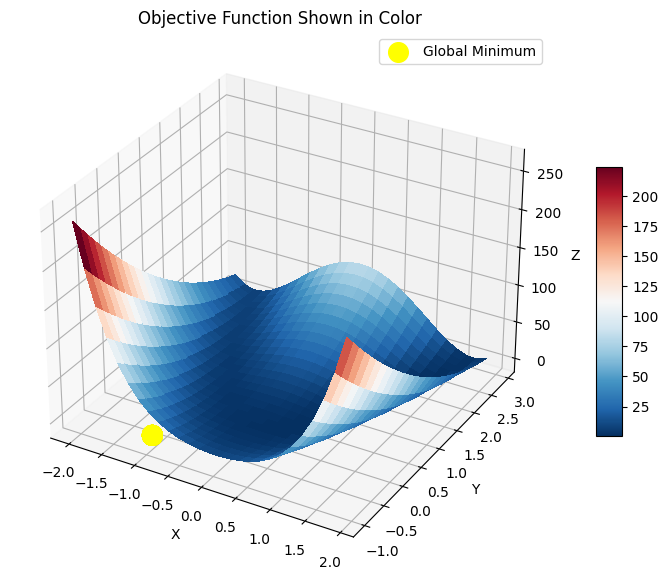

In [14]:
#https://people.bath.ac.uk/ps2106/files/courses/MA40050/2020/jupyter/Rosenbrock.html
def visualize_rosenbrock():
    xcoord = np.arange(-2, 2, 0.15)
    ycoord = np.arange(-1, 3, 0.15)
    w1,w2 = np.meshgrid(xcoord,ycoord)
    b = 10;
    w3 = lambda x,y: (x-1)**2 + b*(y-x**2)**2;
    Z = w3(w1,w2)
    function_plot(w1, w2, Z)

def function_plot(pts, f_val, Z):
    fig = plt.figure(figsize=(12, 7))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(pts, f_val, Z, cmap='RdBu_r',
                           linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=10)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title('Objective Function Shown in Color')

    # Show the optimal point
    ax.scatter(f_val[0], f_val[1], 0, color='yellow', marker='o', s=200, label='Global Minimum')
    ax.legend()
    plt.show()

visualize_rosenbrock()

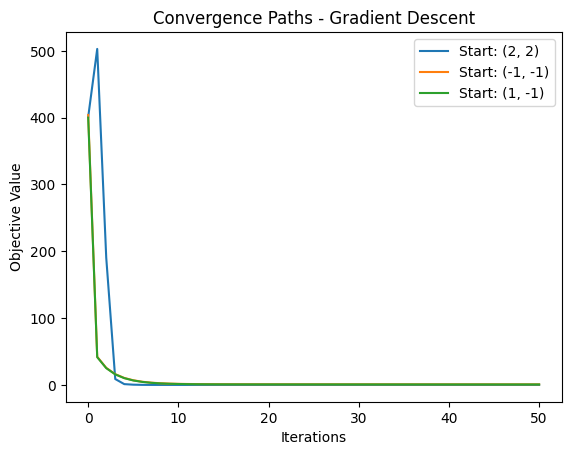

In [37]:
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def gradient_rosenbrock(x, y):
    df_dx = -2 * (1 - x) - 400 * x * (y - x**2)
    df_dy = 200 * (y - x**2)
    return np.array([df_dx, df_dy])

def gradient_descent(starting_point, learning_rate, iterations):
    current_point = starting_point
    history = [current_point]

    for _ in range(iterations):
        gradient = gradient_rosenbrock(*current_point)
        current_point = current_point - learning_rate * gradient
        history.append(current_point)

    return np.array(history)

starting_points = [(2, 2), (-1, -1), (1, -1)]
learning_rate = 0.001
iterations = 50

for start_point in starting_points:
    optimization_path = gradient_descent(start_point, learning_rate, iterations)

    plt.plot(range(len(optimization_path)), [rosenbrock(*point) for point in optimization_path], label=f'Start: {start_point}')

plt.title('Convergence Paths - Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Objective Value')
plt.legend()
plt.show()


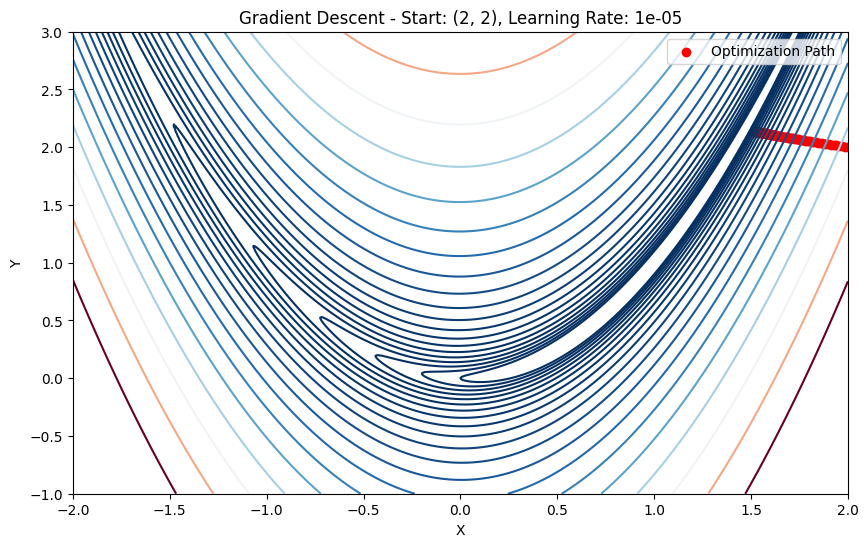

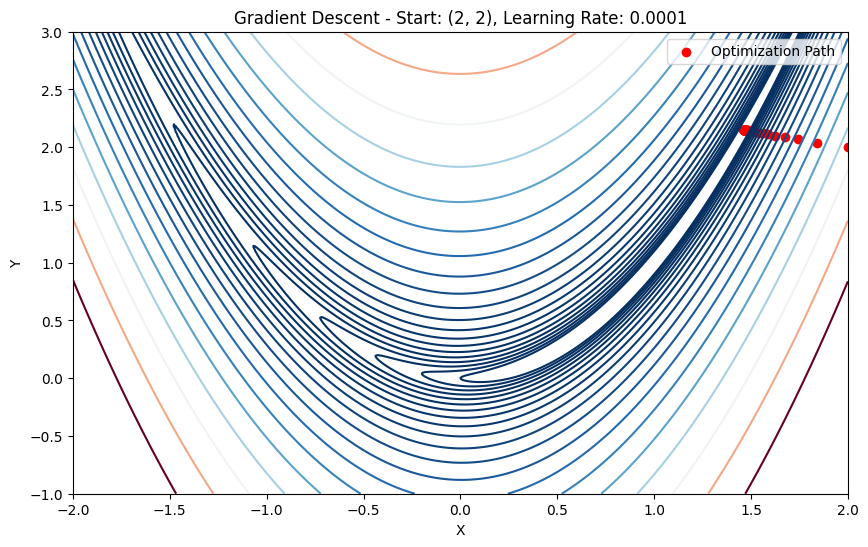

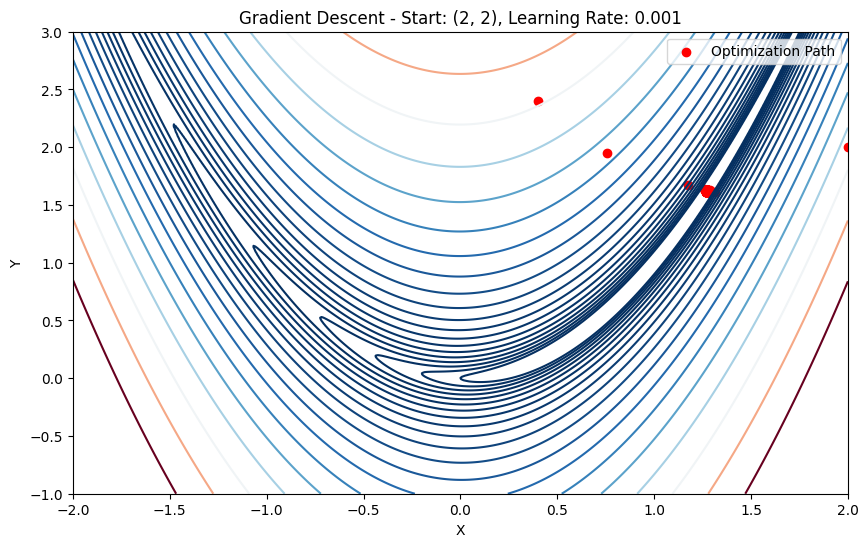

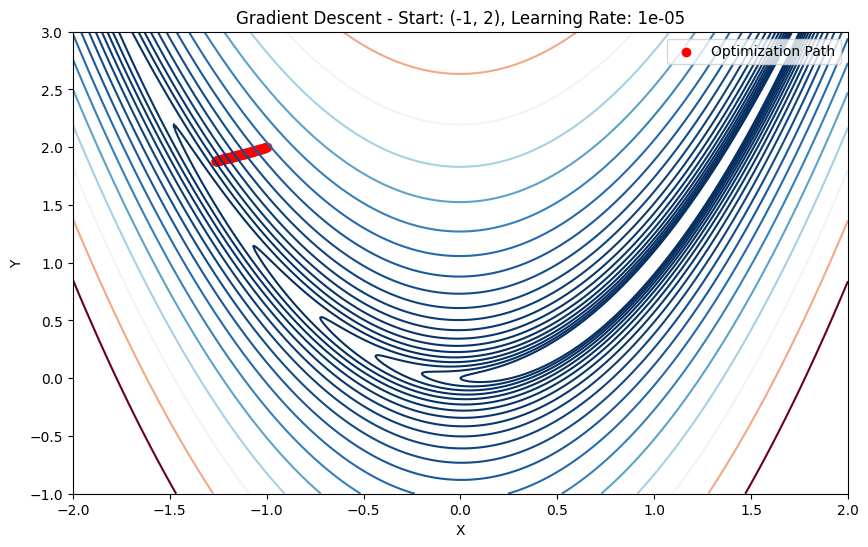

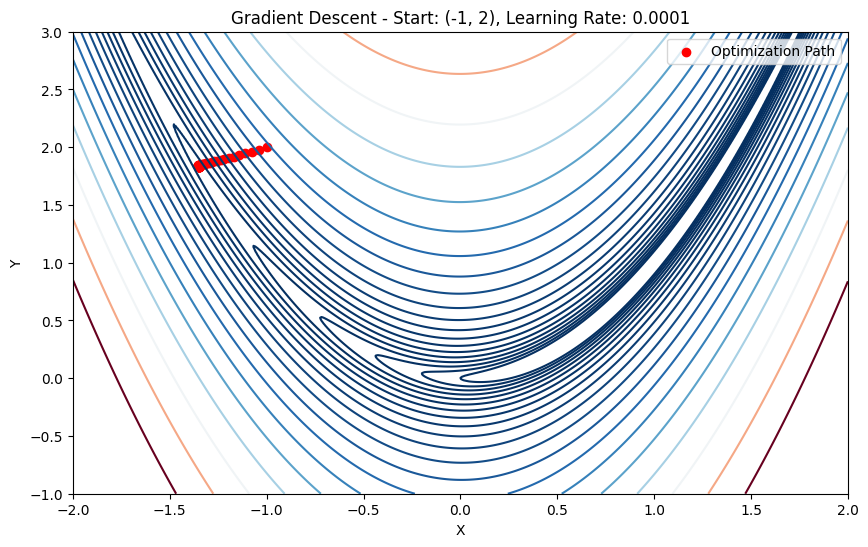

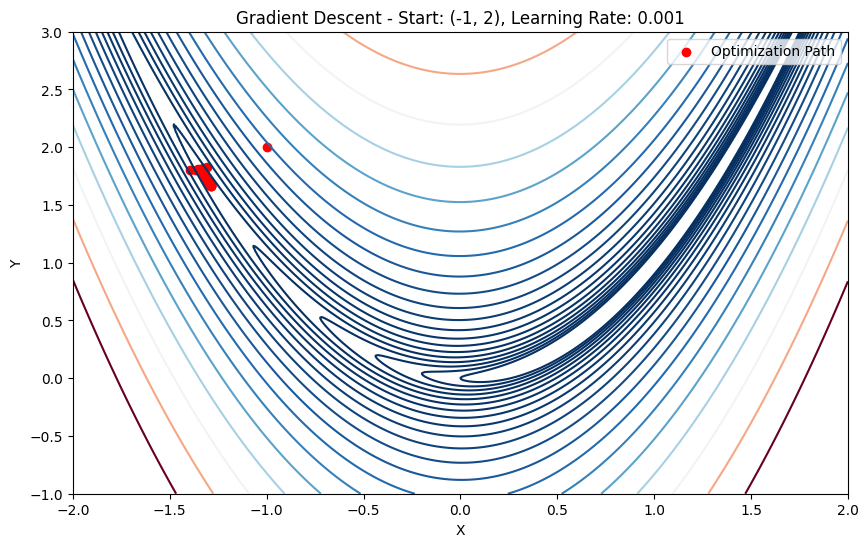

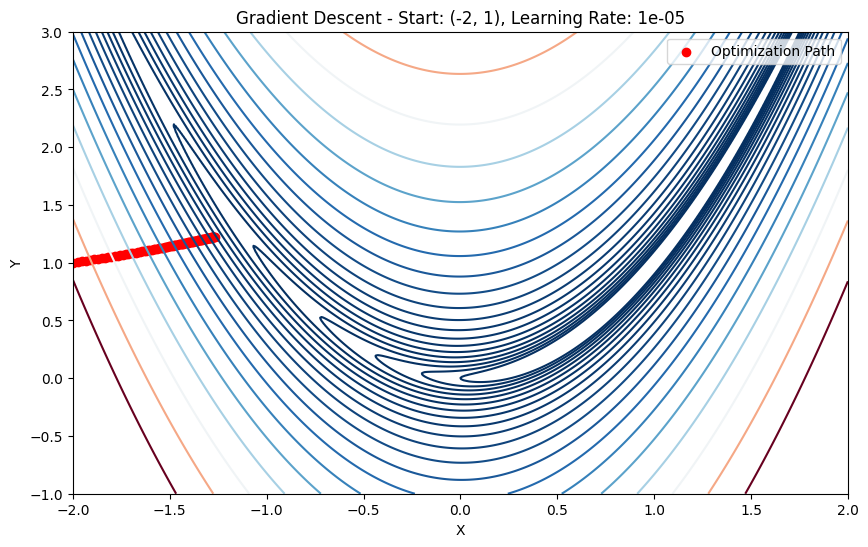

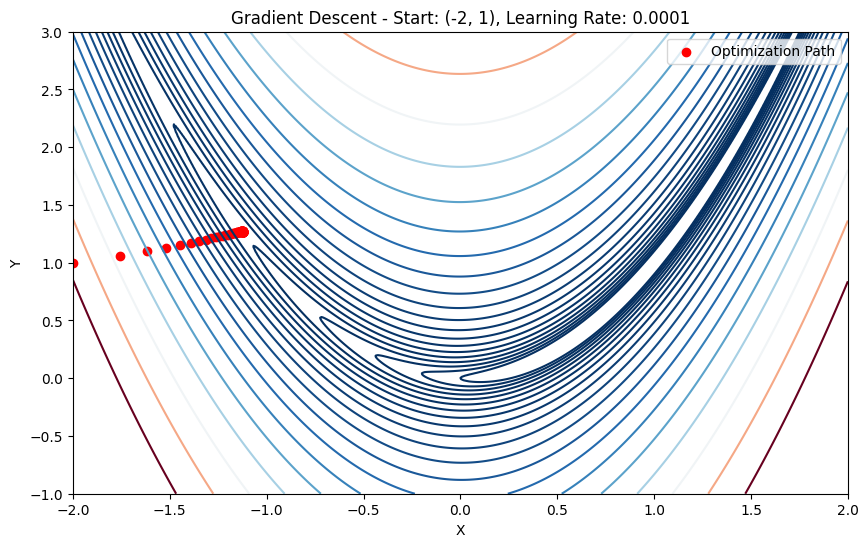

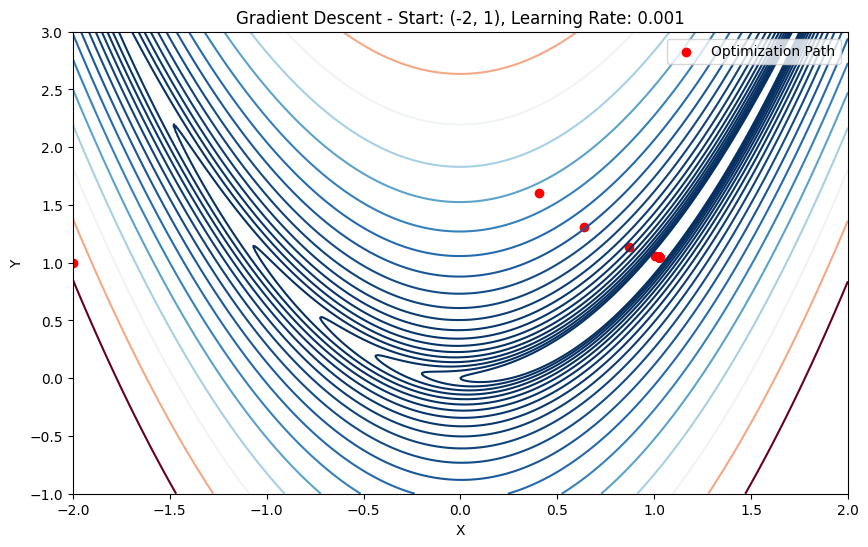

In [41]:
# def rosenbrock(x, y):
#     return (1 - x)**2 + 100 * (y - x**2)**2

# def gradient_rosenbrock(x, y):
#     df_dx = -2 * (1 - x) - 400 * x * (y - x**2)
#     df_dy = 200 * (y - x**2)
#     return np.array([df_dx, df_dy])

# def gradient_descent(starting_point, learning_rate, iterations):
#     current_point = starting_point
#     history = [current_point]

#     for _ in range(iterations):
#         gradient = gradient_rosenbrock(*current_point)
#         current_point = current_point - learning_rate * gradient
#         history.append(current_point)

#     return np.array(history)

def plot_optimization_path(optimization_path, title):
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(x, y)
    Z = rosenbrock(X, Y)

    plt.figure(figsize=(10, 6))
    plt.contour(X, Y, Z, levels=np.logspace(0, 3, 20), cmap='RdBu_r')
    plt.scatter(optimization_path[:, 0], optimization_path[:, 1], color='red', marker='o', label='Optimization Path')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

# Исследование градиентного спуска
starting_points = [(2, 2), (-1, 2), (-2, 1)]
learning_rates = [0.00001, 0.0001, 0.001]
iterations = 100

for start_point in starting_points:
    for lr in learning_rates:
        optimization_path = gradient_descent(np.array(start_point), lr, iterations)
        title = f'Gradient Descent - Start: {start_point}, Learning Rate: {lr}'
        plot_optimization_path(optimization_path, title)


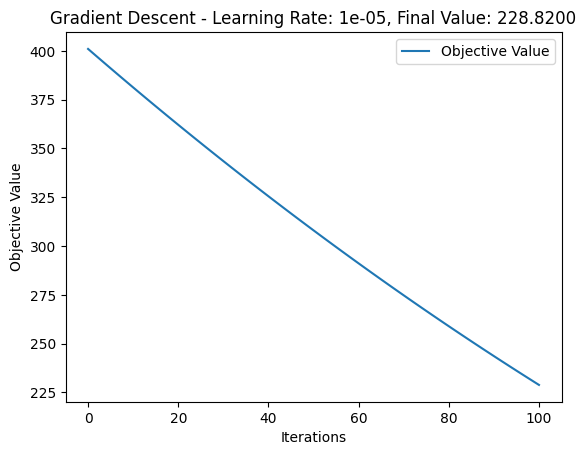

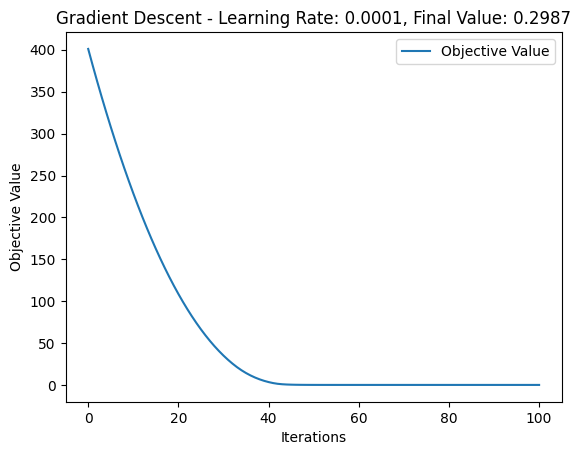

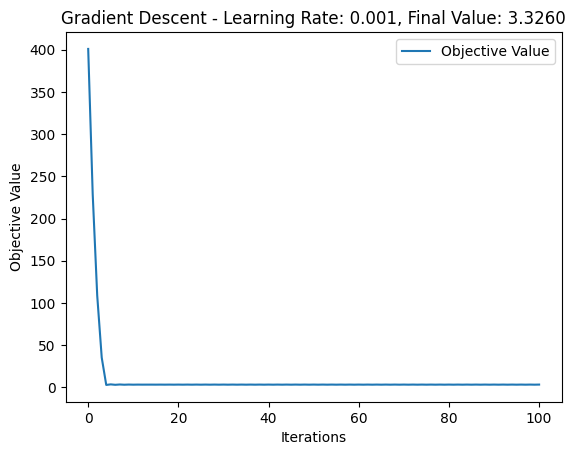

In [51]:
learning_rate = 0.001

def convergence_evaluation(starting_point, learning_rate, iterations):
    optimization_path = gradient_descent(starting_point, learning_rate, iterations)
    final_point = optimization_path[-1]
    final_value = rosenbrock(*final_point)
    return optimization_path, final_point, final_value

def plot_convergence(optimization_path, title):
    plt.plot(range(len(optimization_path)), [rosenbrock(*point) for point in optimization_path], label='Objective Value')
    plt.title(title)
    plt.xlabel('Iterations')
    plt.ylabel('Objective Value')
    plt.legend()
    plt.show()

# Исследование сходимости для различных гиперпараметров
starting_point = (2, 2)
learning_rates = [0.00001, 0.0001, 0.001]
iterations = 100

for lr in learning_rates:
    optimization_path, final_point, final_value = convergence_evaluation(starting_point, lr, iterations)
    title = f'Gradient Descent - Learning Rate: {lr}, Final Value: {final_value:.4f}'
    plot_convergence(optimization_path, title)

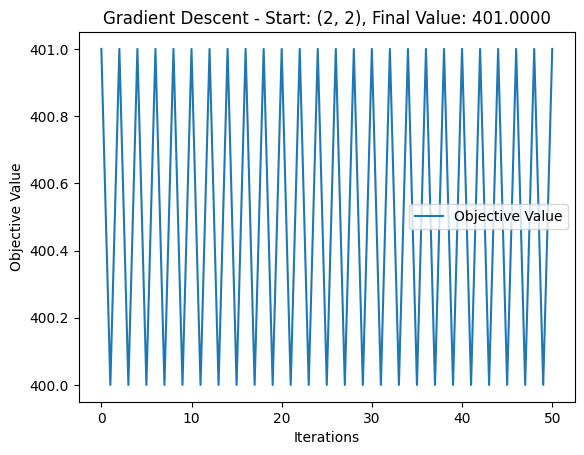

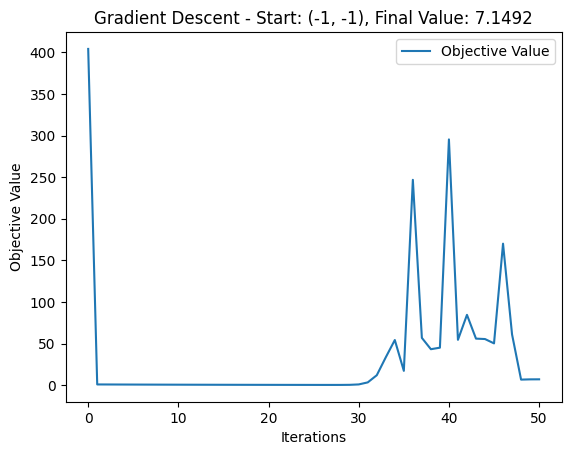

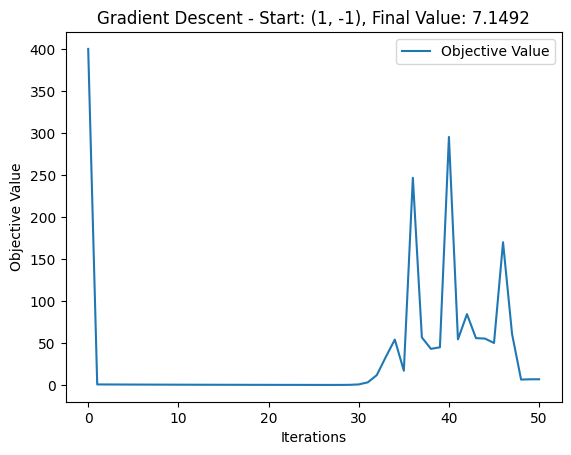

In [50]:
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def gradient_rosenbrock(x, y):
    df_dx = -2 * (1 - x) - 400 * x * (y - x**2)
    df_dy = 200 * (y - x**2)
    return np.array([df_dx, df_dy])

def gradient_descent(starting_point, learning_rate, iterations, clip_value=100.0):
    current_point = starting_point
    history = [current_point]

    for _ in range(iterations):
        gradient = gradient_rosenbrock(*current_point)
        gradient = np.clip(gradient, -clip_value, clip_value)  # Обрежем значения градиента
        current_point = current_point - learning_rate * gradient
        history.append(current_point)

    return np.array(history)

def convergence_evaluation(starting_point, learning_rate, iterations):
    optimization_path = gradient_descent(starting_point, learning_rate, iterations)
    final_point = optimization_path[-1]
    final_value = rosenbrock(*final_point)
    return optimization_path, final_point, final_value

def plot_convergence(optimization_path, title):
    plt.plot(range(len(optimization_path)), [rosenbrock(*point) for point in optimization_path], label='Objective Value')
    plt.title(title)
    plt.xlabel('Iterations')
    plt.ylabel('Objective Value')
    plt.legend()
    plt.show()

# Рассмотрим случаи для разных начальных приближений
starting_points = [(2, 2), (-1, -1), (1, -1)]
learning_rate = 0.01
iterations = 50  # Уменьшено количество итераций

for start_point in starting_points:
    optimization_path, final_point, final_value = convergence_evaluation(start_point, learning_rate, iterations)
    title = f'Gradient Descent - Start: {start_point}, Final Value: {final_value:.4f}'
    plot_convergence(optimization_path, title)



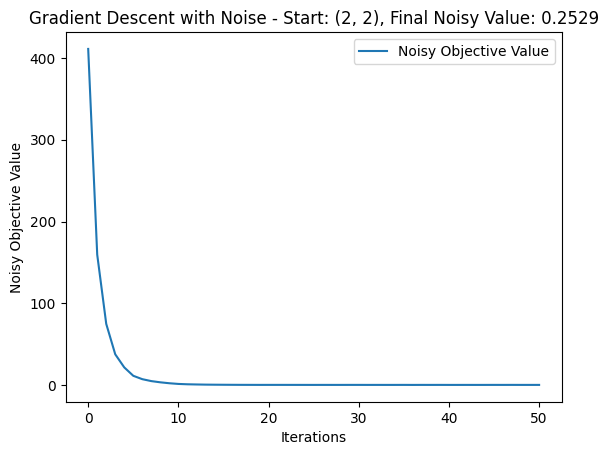

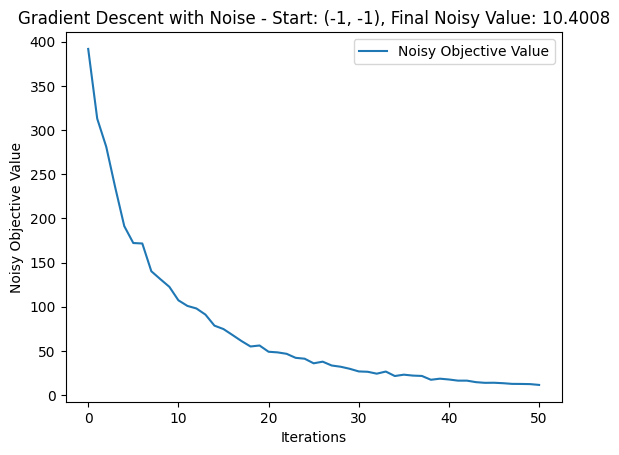

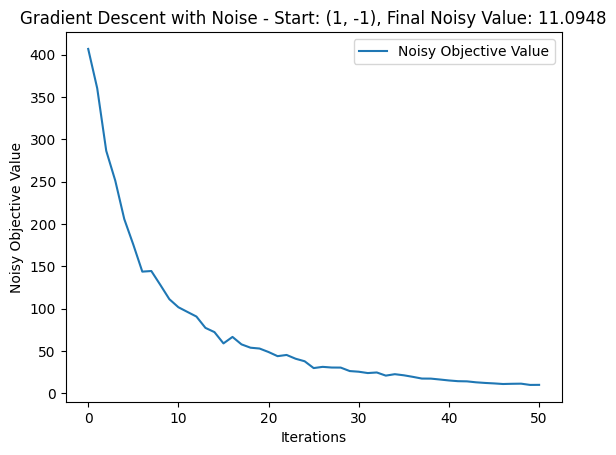

In [46]:
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def gradient_rosenbrock(x, y):
    df_dx = -2 * (1 - x) - 400 * x * (y - x**2)
    df_dy = 200 * (y - x**2)
    return np.array([df_dx, df_dy])

def add_noise(value, noise_factor=0.05):
    noise_factor = max(0, noise_factor)  # Убедимся, что значение Noise_factor неотрицательно
    noise = np.random.normal(0, abs(noise_factor * value) + 1e-10)  # Добавлена константа, чтобы избежать масштабирования = 0
    return value + noise

def noisy_rosenbrock(x, y, noise_factor=0.05):
    return add_noise(rosenbrock(x, y), noise_factor)

def noisy_gradient_rosenbrock(x, y, noise_factor=0.05):
    gradient = gradient_rosenbrock(x, y)
    return np.array([add_noise(gradient[0], noise_factor), add_noise(gradient[1], noise_factor)])

learning_rate=0.0001

def gradient_descent_noisy(starting_point, learning_rate, iterations, noise_factor=0.05):
    current_point = starting_point
    history = [current_point]

    for _ in range(iterations):
        gradient = noisy_gradient_rosenbrock(*current_point, noise_factor)
        current_point = current_point - learning_rate * gradient
        history.append(current_point)

    return np.array(history)

def convergence_evaluation_noisy(starting_point, learning_rate, iterations, noise_factor=0.05):
    optimization_path = gradient_descent_noisy(starting_point, learning_rate, iterations, noise_factor)
    final_point = optimization_path[-1]
    final_value = noisy_rosenbrock(*final_point, noise_factor)
    return optimization_path, final_point, final_value

def plot_convergence_noisy(optimization_path, title):
    plt.plot(range(len(optimization_path)), [noisy_rosenbrock(*point) for point in optimization_path], label='Noisy Objective Value')
    plt.title(title)
    plt.xlabel('Iterations')
    plt.ylabel('Noisy Objective Value')
    plt.legend()
    plt.show()

# Рассмотрим случаи с добавлением шума для разных начальных приближений
starting_points = [(2, 2), (-1, -1), (1, -1)]
learning_rate = 0.0001
iterations = 50
noise_factor = 0.1  # Регулировка уровня шума

for start_point in starting_points:
    optimization_path, final_point, final_value = convergence_evaluation_noisy(start_point, learning_rate, iterations, noise_factor)
    title = f'Gradient Descent with Noise - Start: {start_point}, Final Noisy Value: {final_value:.4f}'
    plot_convergence_noisy(optimization_path, title)


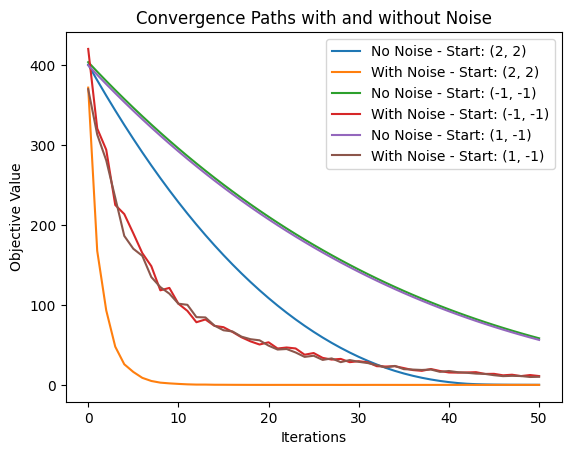

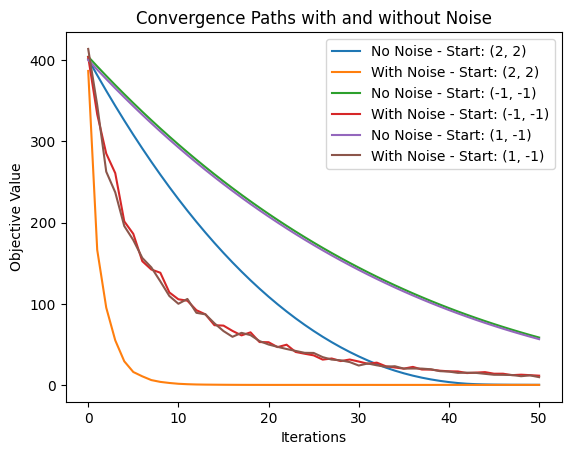

In [47]:
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def gradient_rosenbrock(x, y):
    df_dx = -2 * (1 - x) - 400 * x * (y - x**2)
    df_dy = 200 * (y - x**2)
    return np.array([df_dx, df_dy])

def add_noise(value, noise_factor=0.05):
    noise_factor = max(0, noise_factor)  # Убедимся, что значение Noise_factor неотрицательно
    noise = np.random.normal(0, abs(noise_factor * value) + 1e-10)  # Добавлена константа, чтобы избежать масштабирования = 0
    return value + noise

learning_rate = 0.0001

def noisy_rosenbrock(x, y, noise_factor=0.05):
    return add_noise(rosenbrock(x, y), noise_factor)

def noisy_gradient_rosenbrock(x, y, noise_factor=0.05):
    gradient = gradient_rosenbrock(x, y)
    return np.array([add_noise(gradient[0], noise_factor), add_noise(gradient[1], noise_factor)])

def gradient_descent_noisy(starting_point, learning_rate, iterations, noise_factor=0.05):
    current_point = starting_point
    history = [current_point]

    for _ in range(iterations):
        gradient = noisy_gradient_rosenbrock(*current_point, noise_factor)
        gradient = np.clip(gradient, -1e5, 1e5)  # Ограничиваем значения градиента, чтобы предотвратить переполнение
        current_point = current_point - learning_rate * gradient
        current_point = np.clip(current_point, -1e5, 1e5)  # Ограничиваем значения точек, чтобы предотвратить переполнение
        history.append(current_point)

    return np.array(history)

def convergence_evaluation_noisy(starting_point, learning_rate, iterations, noise_factor=0.05):
    optimization_path = gradient_descent_noisy(starting_point, learning_rate, iterations, noise_factor)
    final_point = optimization_path[-1]
    final_value = noisy_rosenbrock(*final_point, noise_factor)
    return optimization_path, final_point, final_value

# Построение путей сходимости
for start_point in starting_points:
    optimization_path, _, _ = convergence_evaluation(start_point, learning_rate, iterations)
    noisy_optimization_path, _, _ = convergence_evaluation_noisy(start_point, learning_rate, iterations, noise_factor)

    plt.plot(range(len(optimization_path)), [rosenbrock(*point) for point in optimization_path], label=f'No Noise - Start: {start_point}')
    plt.plot(range(len(noisy_optimization_path)), [noisy_rosenbrock(*point) for point in noisy_optimization_path], label=f'With Noise - Start: {start_point}')

plt.title('Convergence Paths with and without Noise')
plt.xlabel('Iterations')
plt.ylabel('Objective Value')
plt.legend()
plt.show()

# Пример 2
for start_point in starting_points:
    optimization_path, _, _ = convergence_evaluation(start_point, learning_rate, iterations)
    noisy_optimization_path, _, _ = convergence_evaluation_noisy(start_point, learning_rate, iterations, noise_factor)

    plt.plot(range(len(optimization_path)), [rosenbrock(*point) for point in optimization_path], label=f'No Noise - Start: {start_point}')
    plt.plot(range(len(noisy_optimization_path)), [noisy_rosenbrock(*point) for point in noisy_optimization_path], label=f'With Noise - Start: {start_point}')

plt.title('Convergence Paths with and without Noise')
plt.xlabel('Iterations')
plt.ylabel('Objective Value')
plt.legend()
plt.show()


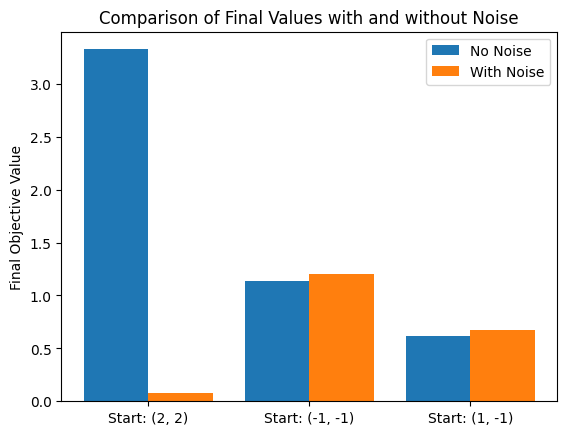

In [35]:
# Сравнение окончательных значений
final_values_no_noise = []
final_values_with_noise = []

learning_rate = 0.001

for start_point in starting_points:
    _, _, final_value_no_noise = convergence_evaluation(start_point, learning_rate, iterations)
    _, _, final_value_with_noise = convergence_evaluation_noisy(start_point, learning_rate, iterations, noise_factor)

    final_values_no_noise.append(final_value_no_noise)
    final_values_with_noise.append(final_value_with_noise)

# Гистограмма
plt.bar(np.arange(len(starting_points)) - 0.2, final_values_no_noise, width=0.4, label='No Noise')
plt.bar(np.arange(len(starting_points)) + 0.2, final_values_with_noise, width=0.4, label='With Noise')

plt.xticks(np.arange(len(starting_points)), [f'Start: {start_point}' for start_point in starting_points])
plt.ylabel('Final Objective Value')
plt.title('Comparison of Final Values with and without Noise')
plt.legend()
plt.show()
